# Image Processing CookBook
## Chapter 09
### Author: Sandipan Dey

### Facial Landmark Detection and Snapchat-like Selfie Filters

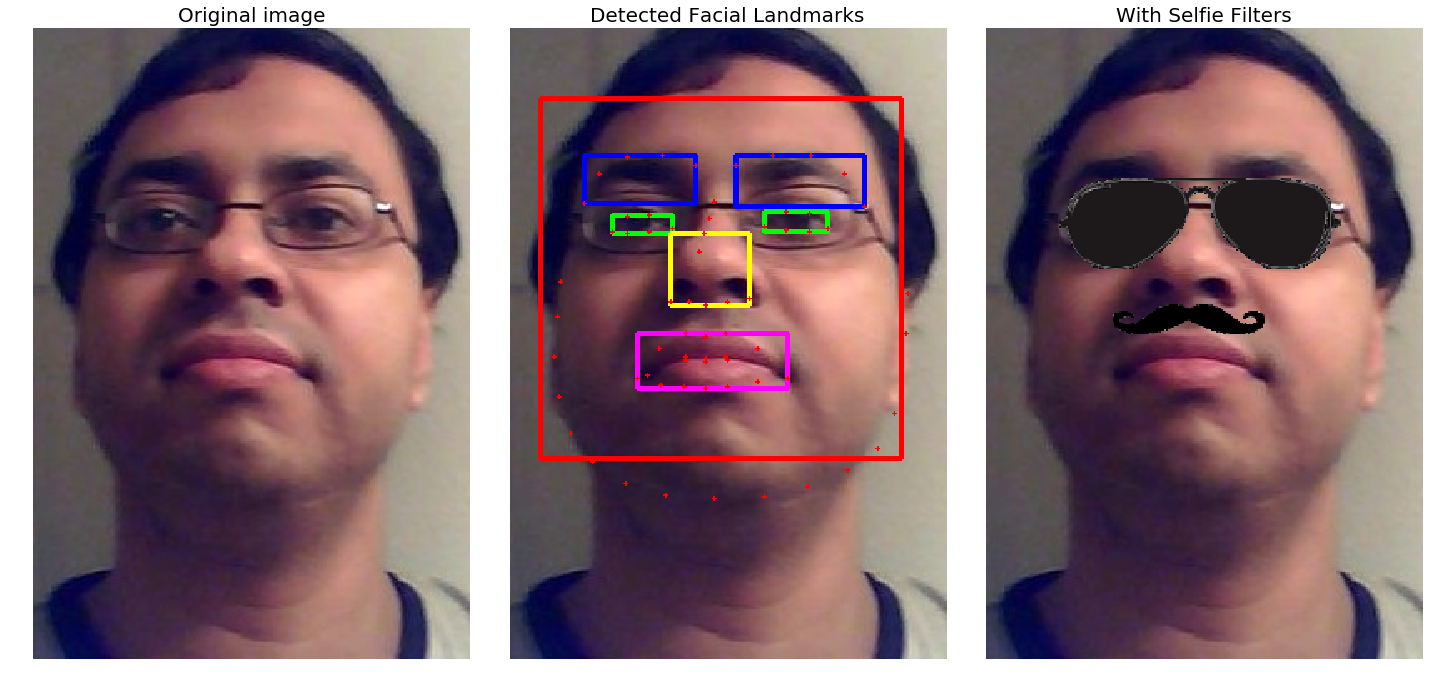

In [85]:
% matplotlib inline
from PIL import Image
import numpy as np
import dlib
import cv2
from imutils import face_utils, rotate_bound
import matplotlib.pylab as plt

# download model from: http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 and uncompress
model = "models/shape_predictor_68_face_landmarks.dat" 
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(model) 

def calculate_boundbox(list_coordinates):
    x = min(list_coordinates[:,0])
    y = min(list_coordinates[:,1])
    w = max(list_coordinates[:,0]) - x
    h = max(list_coordinates[:,1]) - y
    return (x,y,w,h)

def get_face_boundbox(points, face_part):
    if face_part == 1:
        (x,y,w,h) = calculate_boundbox(points[17:22]) #left eyebrow
    elif face_part == 2:
        (x,y,w,h) = calculate_boundbox(points[22:27]) #right eyebrow
    elif face_part == 3:
        (x,y,w,h) = calculate_boundbox(points[36:42]) #left eye
    elif face_part == 4:
        (x,y,w,h) = calculate_boundbox(points[42:48]) #right eye
    elif face_part == 5:
        (x,y,w,h) = calculate_boundbox(points[29:36]) #nose
    elif face_part == 6:
        (x,y,w,h) = calculate_boundbox(points[48:68]) #mouth
    return (x,y,w,h)

colors = [(0, 0, 0), (255, 0, 0), (255, 0, 0), (0, 255, 0), (0, 255, 0), (0, 255, 255), (255, 0, 255)]
orig = cv2.imread('images/me.jpg')
image = orig.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale frame
rects = detector(gray, 0)
# loop over the face detections
for rect in rects:
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    for i in range(1,7):
        (x,y,w,h) = get_face_boundbox(shape, i)
        cv2.rectangle(image, (x, y), (x+w, y+h), colors[i], 2)
    x,y, w, h = rect.left(), rect.top(), rect.width(), rect.height()
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

plt.figure(figsize=(20,10))
plt.subplot(131), plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Original image', size=20)
plt.subplot(132), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Detected Facial Landmarks', size=20)
    
image = orig    
(x_start,y_start,_,h) = calculate_boundbox(shape[17:22]) #left eyebrow
y_start = y_start + h//2
(x_end,_,w,_) = calculate_boundbox(shape[22:27]) #right eyebrow
x_end = x_end + w
(_,y_end,_,h) = calculate_boundbox(shape[29:36]) #nose
y_end = y_end + h//2    
mask = cv2.imread('images/sunglass.png',cv2.IMREAD_UNCHANGED)
temp = cv2.resize(mask,(x_end-x_start+1,y_end-y_start+1))
for i in range(y_start,y_end+1):
    for j in range(x_start,x_end+1):
        if temp[i-y_start,j-x_start,3] != 0:
            image[i,j,:] = temp[i-y_start,j-x_start,:3]
            
(_,y_start,_,h) = calculate_boundbox(shape[29:36]) #nose
(x_start,y_end,w,_) = calculate_boundbox(shape[48:68]) #mouth
y_start, x_end = y_start + h, x_start + w  
mask = cv2.imread('images/mustache.png',cv2.IMREAD_UNCHANGED)
temp = cv2.resize(mask,(x_end-x_start+1,y_end-y_start+1))
for i in range(y_start,y_end+1):
    for j in range(x_start,x_end+1):
        if temp[i-y_start,j-x_start,3] != 0:
            image[i,j,:] = temp[i-y_start,j-x_start,:3]
            
plt.subplot(133), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('With Selfie Filters', size=20)
plt.tight_layout()
plt.show()